In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf

import pandas as pd

In [2]:
COLUMN_NAMES = ['LoveW', 'HorrorW', 'Unclassified','Genres']
GENRES = ['Romance', 'Horror', 'Others']

In [3]:
#File needs to be loaded here
training_file_name = 'book_training_data.csv'# file name needs to change
testing_file_name = 'book_testing_data.csv' #Test data needs to be compiled and added
#train_data = pandas.read_csv(training_file_name, names=names)
#test_data = pandas.read_csv(testing_file_name, name=name)

train = pd.read_csv(training_file_name, names=COLUMN_NAMES, header=0)
test = pd.read_csv(testing_file_name, names=COLUMN_NAMES, header=0)

In [4]:
train.head() # Display our data

,LoveW,HorrorW,Unclassified,Genres
0,458,45,57656,0
1,46,679,56657,1
2,678,76,56675,0
3,567,46,96000,0
4,105,98,89809,2


In [5]:
train_y = train.pop('Genres')
test_y = test.pop('Genres')
train.head() # Genres column is now gone

,LoveW,HorrorW,Unclassified
0,458,45,57656
1,46,679,56657
2,678,76,56675
3,567,46,96000
4,105,98,89809


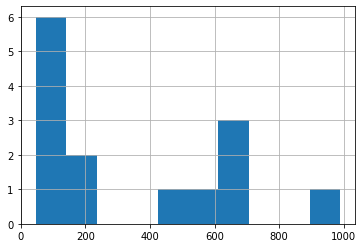

In [7]:
train.LoveW.hist(bins=10)

In [8]:
train.shape # Display entries and features

(14, 3)

In [9]:
#input function
def input_fn(features, labels, training=True, batch_size=256):

    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

In [10]:
# Feature columns
feature_columns = []
for key in train.keys():
    feature_columns.append(tf.feature_column.numeric_column(key=key))
print(feature_columns)

[NumericColumn(key='LoveW', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='HorrorW', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Unclassified', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [11]:
#Use classifier model to train
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/5g/4q_xrqj95ll6j4y7r1wb7wfc0000gn/T/tmpsnvpm1s1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [12]:
# We need to train our model and test from this point on.....
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/5g/4q_xrqj95ll6j4y7r1wb7wfc0000gn/T/tmpsnvpm1s1/model.ckpt.
INFO:tensorflow:loss = 5200.412, step = 0
INFO:tensorflow:global_step/sec: 212.728
INFO:tensorflow:loss = 1917.1914, step = 100 (0.471 sec)
INFO:tensorflow:global_step/sec: 344.532
INFO:tensorflow:loss = 725.7135, step = 200 (0.290 sec)
INFO:tensorflow:global_step/sec: 351.777
INFO:tensorflow:

In [11]:
#Display our result
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-06T14:48:10Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/5g/4q_xrqj95ll6j4y7r1wb7wfc0000gn/T/tmp381vlzjt/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.34658s
INFO:tensorflow:Finished evaluation at 2020-03-06-14:48:10
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.9166667, average_loss = 0.30740306, global_step = 5000, loss = 0.30740306
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /var/folders/5g/4q_xrqj95ll6j4y7r1wb7wfc0000gn/T/tmp381vlzjt/model.ckpt-5000

Test set accuracy: 0.917



In [ ]:
#make a prediction and display probability
def input_fn(features, batch_size=256):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['LoveW', 'HorrorW', 'Unclassified']
predict = {}
print(features)

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid: 
    val = input(feature + ": ")
    if val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
print(predictions)
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        GENRES[class_id], 100 * probability))

['LoveW', 'HorrorW', 'Unclassified']
Please type numeric values as prompted.
